# API Request notebook for air quality satellite data from Google Earth Engine API / geemap

This notebook is used to download data from satellite instruments such as Sentinel-5P Tropomi and Terra&Aqua MODIS.

This notebook allows access to [Google Earth Engine API](https://developers.google.com/earth-engine/datasets) using [geemap](https://geemap.org/) Python library and it requests data over the region identified by the bounding box given as input.
It also calculates the mean value for each variable in the given week (defined in the **date.json** file).

**Sentinel-5P Tropomi** data considered in this notebook:
1. Nitrogen Dioxide - NO2
2. Ozone - O3
3. Sulphur Dioxide - SO2
4. Carbon Monoxide - CO
5. Formaldehyde - CH2O
6. Ultraviole Aerosol Index - UVAI
7. Methane - CH4
8. Aerosol Optical Depth (AOD)

**Terra & Aqua MODIS** data considered in this notebook:
1. Aerosol Optical Depth (AOD) 550 nm 
2. Aerosol Optical Depth (AOD) 470 nm 

Two additional datasets are also downloaded in the last part of the notebook:
1. NDVI 16-Days Global
2. Soil Type OpenLandMap USDA

### Documentation

Reference material and datasets:
1. Sentinel-5P products: https://sentinels.copernicus.eu/web/sentinel/data-products
2. Terra & Aqua MODIS: https://modis.gsfc.nasa.gov/about/
3. geemap site and documentation: https://geemap.org/
4. geemap GitHub repository: https://github.com/giswqs/geemap
5. Google Earth Engine catalog: https://developers.google.com/earth-engine/datasets

Each paragraph links to the specific resource used in this notebook.

### Import libraries

In [8]:
import ee
import geemap
import os
import geopandas as gpd
import json
import ipywidgets as widgets
import datetime
# Import functions defined for DDUST project:
from functions import my_methods

### Authentication
A Google account is required to be able to log in and provide the requested URL:

In [9]:
ee.Authenticate()

Enter verification code:  4/1AX4XfWhimVGkC4NBSsseknxbVWT32QsykZTOMA6Xk6ak1xHB5ibq_1MUXbo



Successfully saved authorization token.


In [10]:
ee.Initialize()

In [11]:
# Set current working directory
cwd = os.getcwd()

### Bounding Box selection
The bounding box for the project is given as input and it's used as Region of Interest (roi) for the following calculations:

In [12]:
area_path = cwd + '/grid/grid_cams.gpkg'
area = gpd.read_file(area_path).to_crs(4326)
bounds = area.total_bounds
roi = ee.Geometry.BBox(bounds[0],bounds[1],bounds[2],bounds[3])

### Date selection
The date is provided with the following order (yyyy-mm-dd). They are stored in the **date.json** file:

In [13]:
d = open('date.json')
date = json.load(d)
year = date['year']
mais_week = date['mais_week']
rice_week = date['rice_week']
cereal_week = date['cereal_week']
custom_week = date['custom_week']

C:\Users\Administrator\anaconda3\envs\ddust\lib\site-packages\plotly_calplot\calplot.py:262: UserWarning:

Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



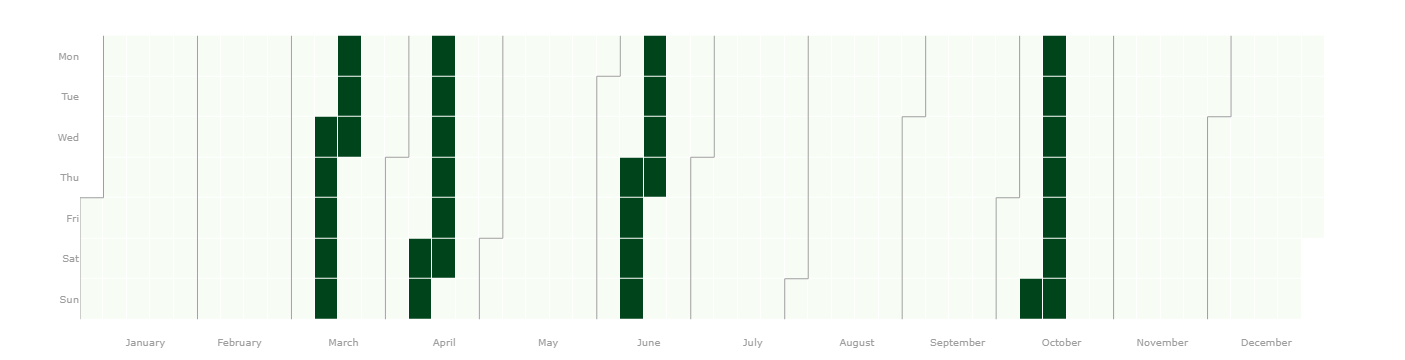

In [14]:
calendar = my_methods.manuring_periods(year, mais_week, rice_week, cereal_week, custom_week)

In [32]:
# With this widget is possible to select from the dropdown list the required week
select_week = widgets.Dropdown(
    options=['mais_week', 'rice_week', 'cereal_week', 'custom_week'],
    description='name:',
    disabled=False)
select_week

Dropdown(description='name:', options=('mais_week', 'rice_week', 'cereal_week', 'custom_week'), value='mais_we…

In [36]:
# Select start and end date of the corresponding selected week:
start_date = str(datetime.datetime.strptime((str(year)+'-'+date[select_week.value][0]), "%Y-%m-%d").date())
end_date = str(datetime.datetime.strptime((str(year)+'-'+date[select_week.value][1]), "%Y-%m-%d").date())
print("For", select_week.value, "the starting date is", start_date,"and the ending date is" , end_date)

For rice_week the starting date is 2021-04-10 and the ending date is 2021-04-17


---

# [NO2 - Nitrogen Dioxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2) 

In [22]:
#Create a map
Map_no2 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_no2

Map(center=[45.5, 10], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [23]:
#Access to NO2 image collection, selecting the band name and giving a date range
no2 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2')\
  .select('tropospheric_NO2_column_number_density')\
  .filterDate(start_date, end_date);

#Image visualization properties
no2_viz = {
    'min': 0,
    'max': 0.0001,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
no2 = no2.mean()
Map_no2 .addLayer(no2, no2_viz, 'no2');

In [ ]:
#Clip over the ROI previously defined
no2_clip = no2.clip(roi)
Map_no2.addLayer(no2_clip, no2_viz, 'no2');

In [ ]:
# Set output directory
out_dir = os.path.expanduser(cwd + '/temp')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

filename = os.path.join(out_dir, 'no2_s5p.tif')

In [ ]:
#Export the NO2 .tif file in the directory selected by filename
geemap.ee_export_image(no2_clip, filename=filename, scale = 3500)

---

# [SO2 - Sulphur Dioxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_SO2) 

In [ ]:
Map_so2 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_so2 

In [ ]:
#Access to SO2 image collection, selecting the band name and giving a date range
so2 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_SO2')\
  .select('SO2_column_number_density')\
  .filterDate(start_date, end_date);

#Image visualization properties
so2_viz = {
    'min': 0,
    'max': 0.001,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
so2 = so2.mean()
Map_so2 .addLayer(so2, so2_viz, 'so2');

In [ ]:
#Clip over the ROI previously defined
so2_clip = so2.clip(roi)
Map_so2 .addLayer(so2_clip, so2_viz, 'so2');

In [ ]:
# Set output directory for SO2
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'so2_s5p.tif')

In [ ]:
geemap.ee_export_image(so2_clip, filename=filename, scale= 3500)

---

# [UVAI - Ultraviolet Aerosol Index](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_AER_AI) 

In [ ]:
Map_uvai = geemap.Map(center=[45.5,10], zoom = 7 )
Map_uvai

In [ ]:
#Access to UV Aerosol index image collection, selecting the band name and giving a date range
uvai = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_AER_AI')\
  .select('absorbing_aerosol_index')\
  .filterDate(start_date, end_date);

#Image visualization properties
uvai_viz = {
    'min': -2,
    'max': 0.1,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
uvai = uvai.mean()
Map_uvai.addLayer(uvai, uvai_viz, 'uvai');

In [ ]:
#Clip over the ROI previously defined
uvai_clip = uvai.clip(roi)
Map_uvai.addLayer(uvai_clip, uvai_viz, 'uvai');

In [ ]:
# Set output directory for UVAI
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'uvai_s5p.tif')

In [ ]:
geemap.ee_export_image(uvai_clip, filename=filename, scale=3500)

- - -

# [CO - Carbon Monoxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CO) 

In [ ]:
Map_co = geemap.Map(center=[45.5,10], zoom = 7 )
Map_co

In [ ]:
#Access to CO image collection, selecting the band name and giving a date range
co = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CO')\
  .select('CO_column_number_density')\
  .filterDate(start_date, end_date);

#Image visualization properties
co_viz = {
    'min': 0,
    'max': 0.05,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

co = co.mean()
Map_co.addLayer(co, co_viz, 'co');

In [ ]:
#Clip over the ROI previously defined
co_clip = co.clip(roi)
Map_co.addLayer(co_clip, co_viz, 'co');

In [ ]:
# Set output directory for CO
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'co_s5p.tif')

In [ ]:
geemap.ee_export_image(co_clip, filename=filename, scale= 5500)

- - -

# [CH2O - Formaldehyde](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_HCHO) 

In [ ]:
Map_form = geemap.Map(center=[45.5,10], zoom = 7 )
Map_form

In [ ]:
#Access to HCHO image collection, selecting the band name and giving a date range
form = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_HCHO')\
  .select('tropospheric_HCHO_column_number_density')\
  .filterDate(start_date, end_date);

#Image visualization properties
form_viz = {
    'min': 0,
    'max': 0.0003,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
form = form.mean()
Map_form.addLayer(form, form_viz, 'form');

In [ ]:
#Clip over the ROI previously defined
form_clip = form.clip(roi)
Map_form.addLayer(form_clip, form_viz, 'form');

In [ ]:
# Set output directory for Ozone
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'ch2o_s5p.tif')

In [ ]:
geemap.ee_export_image(form_clip, filename=filename, scale= 3500)

---

# [O3 - Ozone](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_O3) 

In [ ]:
Map_o3 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_o3

In [ ]:
#Access to O3 image collection, selecting the band name and giving a date range
o3 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_O3')\
  .select('O3_column_number_density')\
  .filterDate(start_date, end_date);

#Image visualization properties
o3_viz = {
    'min': 0,
    'max': 0.17,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
o3 = o3.mean()
Map_o3.addLayer(o3, o3_viz, 'o3');

In [ ]:
#Clip over the ROI previously defined
o3_clip = o3.clip(roi)
Map_o3.addLayer(o3_clip, o3_viz, 'o3');

In [ ]:
# Set output directory for Ozone
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'o3_s5p.tif')

In [ ]:
geemap.ee_export_image(o3_clip, filename=filename, scale= 3500)

- - -

# [CH4 - Methane](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CH4#bands) 

In [ ]:
#Create a map
Map_ch4 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_ch4

In [ ]:
#Access to CH4 image collection, selecting the band name and giving a date range
ch4 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4')\
  .select('CH4_column_volume_mixing_ratio_dry_air')\
  .filterDate(start_date, end_date);

#Image visualization properties
ch4_viz = {
    'min': 1750,
    'max': 1900,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
ch4 = ch4.mean()
Map_ch4 .addLayer(ch4, ch4_viz, 'ch4');

In [ ]:
#Clip over the ROI previously defined
ch4_clip = ch4.clip(roi)
Map_ch4 .addLayer(ch4_clip, ch4_viz, 'ch4');

In [ ]:
# Set output directory for Ozone
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'ch4_s5p.tif')

In [ ]:
geemap.ee_export_image(ch4_clip, filename=filename, scale= 5500)

----

# [AOD 550nm - Aerosol Optical Depth](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD19A2_GRANULES) 

In [ ]:
Map_aod55 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_aod55

In [ ]:
#Access to AOD 500 nm image collection, selecting the band name and giving a date range
aod55 = ee.ImageCollection('MODIS/006/MCD19A2_GRANULES')\
  .select('Optical_Depth_055')\
  .filterDate(start_date, end_date);

#Image visualization properties
aod55_viz = {
    'min': 0,
    'max': 250,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
aod55 = aod55.mean()
Map_aod55.addLayer(aod55, aod55_viz, 'aod55');

In [ ]:
#Clip over the ROI previously defined
aod55_clip = aod55.clip(roi)
Map_aod55.addLayer(aod55_clip, aod55_viz, 'aod55');

In [ ]:
# Set output directory for AOD
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'aod_055.tif')

In [ ]:
geemap.ee_export_image(aod55_clip, filename=filename, scale=1000)

----

# [AOD 470nm - Aerosol Optical Depth](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD19A2_GRANULES) 

In [ ]:
Map_aod47 = geemap.Map(center=[45.5,10], zoom = 7 )
Map_aod47

In [ ]:
#Access to AOD 470 nm image collection, selecting the band name and giving a date range
aod47 = ee.ImageCollection('MODIS/006/MCD19A2_GRANULES')\
  .select('Optical_Depth_047')\
  .filterDate(start_date, end_date);

#Image visualization properties
aod47_viz = {
    'min': 0,
    'max': 250,
    'opacity': 0.75,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};

#Calculate the mean value for each pixel in the time range
aod47 = aod47.mean()
Map_aod47.addLayer(aod47, aod47_viz, 'aod47');

In [ ]:
#Clip over the ROI previously defined
aod47_clip = aod47.clip(roi)
Map_aod47.addLayer(aod47_clip, aod47_viz, 'aod47');

In [ ]:
# Set output directory for AOD
out_dir = os.path.expanduser(cwd + '/temp')

filename = os.path.join(out_dir, 'aod_047.tif')

In [ ]:
geemap.ee_export_image(aod47_clip, filename=filename, scale=1000)

---

# [NDVI - Normalized Difference Vegetation Index - 16-Day Global](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1) 

Since the NDVI data are available every 16 days, the next NDVI is selected if not available in the selected week: 

In [53]:
ndvi_date_end = str(datetime.datetime.strptime(str(year)+'-'+date[select_week.value][1], "%Y-%m-%d").date()+datetime.timedelta(days=10))

'2021-04-27'

In [55]:
Map_ndvi = geemap.Map(center=[45.5,10], zoom = 7 )
Map_ndvi

Map(center=[45.5, 10], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [56]:
#Access to NDVI image collection, selecting the band name and giving a date range
ndvi= ee.ImageCollection('MODIS/006/MOD13Q1')\
  .select('NDVI')\
  .filterDate(start_date, ndvi_date_end);

#Image visualization properties
ndvi_viz = {
    'min': 0,
    'max': 8000,
    'opacity': 0.75,
    'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ]
};

#Calculate the mean value for each pixel in the time range
ndvi = ndvi.mean()
Map_ndvi.addLayer(ndvi, ndvi_viz, 'ndvi');

In [ ]:
ndvi_clip = ndvi.clip(roi)
Map_ndvi.addLayer(ndvi_clip, ndvi_viz, 'ndvi');

In [ ]:
# Set output directory for NDVI
out_dir = os.path.expanduser(cwd + '/temp')


filename = os.path.join(out_dir, 'ndvi.tif')

In [ ]:
geemap.ee_export_image(ndvi_clip, filename=filename, scale=250)

- - -

Additional layer for Soil type classification:

# [Soil type - Open Land Map USDA](https://developers.google.com/earth-engine/datasets/catalog/OpenLandMap_SOL_SOL_TEXTURE-CLASS_USDA-TT_M_v02#description)

In [ ]:
Map_soil = geemap.Map(center=[45.5,10], zoom = 7 )
Map_soil

In [ ]:
#Access to USDA Open Land Map soil type image
soil = ee.Image("OpenLandMap/SOL/SOL_TEXTURE-CLASS_USDA-TT_M/v02")\
        .select('b0')

soil_viz = {
  'bands': ['b0'],
  'min': 1.0,
  'max': 12.0,
  'palette': [
    "d5c36b","b96947","9d3706","ae868f","f86714","46d143",
    "368f20","3e5a14","ffd557","fff72e","ff5a9d","ff005b",
  ]
};

In [ ]:
soil_clip = soil.clip(roi)

In [ ]:
Map_soil.addLayer(soil_clip, soil_viz, 'Soil Type');

In [ ]:
out_dir = os.path.expanduser(cwd + '/terrain')
filename = os.path.join(out_dir, 'soil_type.tif')
geemap.ee_export_image(soil_clip, filename=filename, scale=250)